In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import itertools

In [47]:
def import_dataset():
    df = pd.read_csv('data/iris_data/iris.data', header=None)
    df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
    return df.drop(columns='class')

   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica

In [48]:
iris = import_dataset()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [50]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Kernel Feature Space

In [51]:
def quadratic_kernel_matrix(df:pd.DataFrame):
    X = df.values
    return (X @ X.T)**2

In [52]:
K = quadratic_kernel_matrix(iris)

In [53]:
K.shape

(150, 150)

In [54]:
np.eye(5, 5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [55]:
def center_kernel(K: np.ndarray):
    n = K.shape[0]
    K_center = (np.eye(n, n) - np.ones((n, n)) / n) @ K @ (np.eye(n, n) - np.ones((n, n)) / n)
    return K_center

In [56]:
np.diag((np.array([[1, 2], [3, 4]])))

array([1, 4])

In [57]:
def center_normalized_matrix(K: np.ndarray):
    n = K.shape[0]
    K_center = (np.eye(n, n) - np.ones((n, n)) / n) @ K @ (np.eye(n, n) - np.ones((n, n)) / n)
    W = np.diag(1 / np.sqrt(np.diag(K_center)))
    return W @ K_center @ W

In [58]:
K_cn = center_normalized_matrix(K)

In [59]:
K_cn.shape

(150, 150)

In [60]:
K

array([[1620.8676, 1405.5001, 1371.2209, ..., 2634.7689, 2656.3716,
        2312.6481],
       [1405.5001, 1225.7001, 1189.5601, ..., 2355.1609, 2361.96  ,
        2062.0681],
       [1371.2209, 1189.5601, 1160.0836, ..., 2238.2361, 2256.25  ,
        1964.2624],
       ...,
       [2634.7689, 2355.1609, 2238.2361, ..., 6771.6441, 6918.9124,
        6001.6009],
       [2656.3716, 2361.96  , 2256.25  , ..., 6918.9124, 7131.8025,
        6155.9716],
       [2312.6481, 2062.0681, 1964.2624, ..., 6001.6009, 6155.9716,
        5337.7636]])

In [61]:
type(K)

numpy.ndarray

In [62]:
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [63]:
K_np = iris.to_numpy()

In [64]:
K_np

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [65]:
K_center = K_np - K_np.mean(axis=0)

In [66]:
K_center

array([[-7.43333333e-01,  4.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01, -5.40000000e-02, -2.35866667e+00,
        -9.98666667e-01],
       [-1.14333333e+00,  1.46000000e-01, -2.45866667e+00,
        -9.98666667e-01],
       [-1.24333333e+00,  4.60000000e-02, -2.25866667e+00,
        -9.98666667e-01],
       [-8.43333333e-01,  5.46000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-4.43333333e-01,  8.46000000e-01, -2.05866667e+00,
        -7.98666667e-01],
       [-1.24333333e+00,  3.46000000e-01, -2.35866667e+00,
        -8.98666667e-01],
       [-8.43333333e-01,  3.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.44333333e+00, -1.54000000e-01, -2.35866667e+00,
        -9.98666667e-01],
       [-9.43333333e-01,  4.60000000e-02, -2.25866667e+00,
        -1.09866667e+00],
       [-4.43333333e-01,  6.46000000e-01, -2.25866667e+00,
        -9.98666667e-01],
       [-1.04333333e+00,  3.46000000e-01, -2.15866667e+00,
      

In [67]:
K_center.sum(axis=0)

array([-4.97379915e-14, -3.90798505e-14,  7.10542736e-14, -1.42108547e-14])

In [68]:
K_cn.shape

(150, 150)

In [71]:
w, v = np.linalg.eig(K_cn)
w = w.real

In [72]:
w.sum()

150.00000000000003

In [73]:
w.shape

(150,)

In [74]:
v.shape

(150, 150)

In [75]:
(w.cumsum() / w.sum() > 0.9).argmax() + 1

2

In [76]:
pc1 = v[:, 0].real
pc2 = v[:, 1].real

In [77]:
pc1_coordinate = K_cn @ pc1
pc2_coordinate = K_cn @ pc2

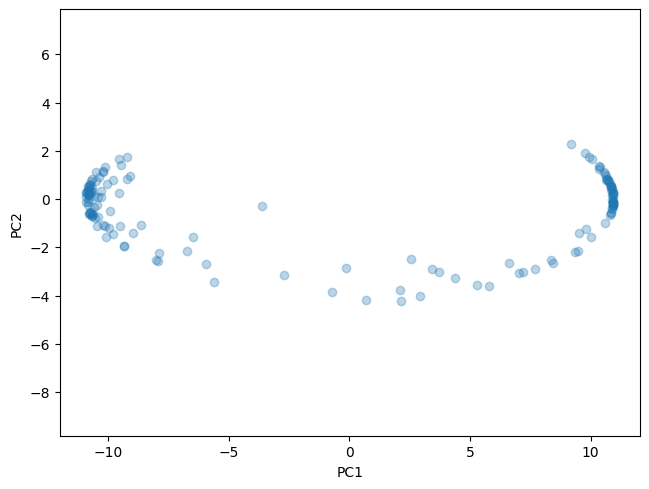

In [81]:
fig, ax = plt.subplots()
ax.scatter(pc1_coordinate, pc2_coordinate, alpha=0.3)
plt.tight_layout()
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.axis('equal')
plt.show()